<a href="https://colab.research.google.com/github/HarshavardhanBhupathi/Data-science/blob/main/Datascience1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Question 1
(50 points, 5 points each)
<p>Import 'COVIDVaccine.csv'. The data contains the information about vaccination population in the US based on demographics.</p>
<p> 'Dose1' variable records the total number of people who got at least the first shot of the vaccine on that day in that demographic group.</p>
<p> 'FullVac' variable records the total number of people who got fully vaccinated (two shots) on that day in that demographic group. </p>

In [ ]:
#import the packages
import pandas as pd
import numpy as np

In [ ]:
# Read in the dataset
cd=pd.read_csv(r"C:\Users\Rajesh Reddy\Downloads\COVIDVaccine.csv")
cd

,Date,Demcat,Dose1,FullVac
0,11/17/2021 0:00,Age_unknown,23646,5596
1,11/17/2021 0:00,Ages_<12yrs,1946263,130400
2,11/17/2021 0:00,Ages_<18yrs,15658033,11730333
3,11/17/2021 0:00,Ages_12-15_yrs,8831424,7391323
4,11/17/2021 0:00,Ages_16-17_yrs,4880346,4208610
...,...,...,...,...
8020,1/1/2021 0:00,Ages_<12yrs,930,12
8021,1/1/2021 0:00,Race_eth_unknown,1594516,5965
8022,1/1/2021 0:00,Sex_unknown,141286,68
8023,1/1/2021 0:00,Ages_75+_yrs,124562,461


In [ ]:
# Check the basic information about the dataset using info()
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8025 entries, 0 to 8024
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     8025 non-null   object
 1   Demcat   8025 non-null   object
 2   Dose1    8025 non-null   int64 
 3   FullVac  8025 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 250.9+ KB


In [ ]:
# Any msising value?
cd.isna().sum()
##No missing values

Date       0
Demcat     0
Dose1      0
FullVac    0
dtype: int64

In [ ]:
# Check the unique values for Date and Demcat (Demographic categories)
cd.Date.unique()
# When was the starting date?

# What are the three demo categories? What is the other one category beside these three demo categories?
cd.Demcat.unique()

array(['Age_unknown', 'Ages_<12yrs', 'Ages_<18yrs', 'Ages_12-15_yrs',
       'Ages_16-17_yrs', 'Ages_18-24_yrs', 'Ages_18-29_yrs',
       'Ages_25-39_yrs', 'Ages_30-39_yrs', 'Ages_40-49_yrs',
       'Ages_50-64_yrs', 'Ages_65-74_yrs', 'Ages_75+_yrs',
       'Race_eth_Hispanic', 'Race_eth_NHAIAN', 'Race_eth_NHAsian',
       'Race_eth_NHBlack', 'Race_eth_NHMult_Oth', 'Race_eth_NHNHOPI',
       'Race_eth_NHWhite', 'Race_eth_unknown', 'Sex_Female', 'Sex_Male',
       'Sex_unknown', 'US'], dtype=object)

In [ ]:
# Change variable 'Date' to datetime datatype
cd['Date']=pd.to_datetime(cd['Date'])
cd['Date']

0      2021-11-17
1      2021-11-17
2      2021-11-17
3      2021-11-17
4      2021-11-17
          ...    
8020   2021-01-01
8021   2021-01-01
8022   2021-01-01
8023   2021-01-01
8024   2021-01-01
Name: Date, Length: 8025, dtype: datetime64[ns]

In [ ]:
# Create a new variable 'Month' indicating the month of the date
cd['Month']=cd['Date'].dt.month
cd['Month']

0       11
1       11
2       11
3       11
4       11
        ..
8020     1
8021     1
8022     1
8023     1
8024     1
Name: Month, Length: 8025, dtype: int64

In [ ]:
# Filter the data to only contain US category.
cd[cd['Demcat']=='US']

,Date,Demcat,Dose1,FullVac,Month
24,2021-11-17,US,210028460,179882456,11
49,2021-11-16,US,209565196,179719853,11
67,2021-11-15,US,209027690,179572803,11
78,2021-11-14,US,208512899,179424920,11
120,2021-11-13,US,208079534,179266970,11
...,...,...,...,...,...
7922,2021-01-05,US,4111456,14211,1
7939,2021-01-04,US,3979470,13086,1
7956,2021-01-03,US,3801937,12322,1
7983,2021-01-02,US,3655045,11832,1


In [ ]:
# Caculate the average of Dose1 by month. Save the results to an object
avgd=cd.groupby(['Month'])["Dose1"].mean()
avgd
# Caculate the average of FullVac by month. Save the results to an object
avgf=cd.groupby(['Month'])["FullVac"].mean()
avgf

Month
1     3.095091e+05
2     2.241527e+06
3     6.096075e+06
4     1.224837e+07
5     1.907702e+07
6     2.312964e+07
7     2.561781e+07
8     2.700779e+07
9     2.878936e+07
10    3.024763e+07
11    3.115174e+07
Name: FullVac, dtype: float64

<AxesSubplot:xlabel='Month'>

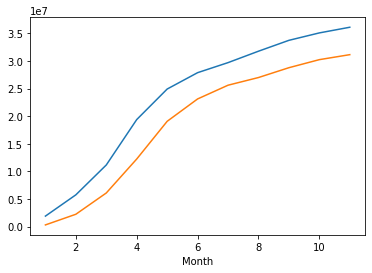

In [ ]:
# Using the results from last step.
# Hint: very simple. Use the results directly. 
# We have similar examples in our assignments or notebooks.
# Make a line plot of average Dose1 change over month
avgd.plot()
# Make a line plot of FullVac change over month 
avgf.plot()

In [ ]:
# Filter the data to only contain 'Race_eth_Hispanic', 'Race_eth_NHAsian', 'Race_eth_NHBlack', 'Race_eth_NHWhite'
# Hint: refer to our example of World development for filtering
f=cd[cd.Demcat.isin(['Race_eth_Hispanic', 'Race_eth_NHAsian', 'Race_eth_NHBlack', 'Race_eth_NHWhite'])]
f
##cd[(cd.Demcat=='Race_eth_Hispanic')or(cd.Demcat== 'Race_eth_NHAsian')or(cd.Demcat=='Race_eth_NHBlack')or (cd.Demcat== 'Race_eth_NHWhite')]

,Date,Demcat,Dose1,FullVac,Month
13,2021-11-17,Race_eth_Hispanic,24501092,21750585,11
15,2021-11-17,Race_eth_NHAsian,8545465,8008749,11
16,2021-11-17,Race_eth_NHBlack,15025405,13340110,11
19,2021-11-17,Race_eth_NHWhite,86955111,78938817,11
38,2021-11-16,Race_eth_Hispanic,24440100,21724083,11
...,...,...,...,...,...
7999,2021-01-02,Race_eth_NHBlack,91657,294,1
8000,2021-01-01,Race_eth_NHAsian,121032,313,1
8002,2021-01-01,Race_eth_Hispanic,190541,595,1
8007,2021-01-01,Race_eth_NHBlack,81050,268,1


### Question 2
(55 points, 5 points each)<br>
This question is about Apps in GooglePlay Store. It contains the following variables. We will use App features to predict App Rating. So, Rating is the target variable.

Category: application category 

Rating: overall user rating of the app as when scraped 

Reviews: number of user reviews for the app as when scraped

Size: size of the app as when scraped 

Installs: number of user downloads/installs for the app as when scraped 

Type: paid or free 

Price: Price of the app 

Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult

Genres: An app can belong to multiple genres (apart from its main category). For eg, 
a musical family game will belong to Music, Game, Family genres.

Last Updated: Date when the app was last updated on Play Store (as when scraped)

Current Ver: Current version of the app available on Play Store (as when scraped)

Android Ver: Min required Android version (as when scraped)

In [ ]:
# Read in the dataset
g=pd.read_csv(r"C:\Users\Rajesh Reddy\Downloads\googleplaystore.csv")
g

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Test Application DT 02,ART_AND_DESIGN,NaN,0,1.2M,0+,Free,0,Everyone,Art & Design,14-Mar-17,4,4.2 and up
1,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
2,Dp for girls,ART_AND_DESIGN,4.2,175,8.2M,"50,000+",Free,0,Everyone,Art & Design,26-May-17,1.2,4.0.3 and up
3,Easy Realistic Drawing Tutorial,ART_AND_DESIGN,4.1,223,4.2M,"100,000+",Free,0,Everyone,Art & Design,22-Aug-17,1,2.3 and up
4,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,The Weather Network,WEATHER,3.9,135337,Varies with device,"5,000,000+",Free,0,Everyone,Weather,6-Aug-18,Varies with device,Varies with device
10837,wetter.com - Weather and Radar,WEATHER,4.2,189313,38M,"10,000,000+",Free,0,Everyone,Weather,6-Aug-18,Varies with device,Varies with device
10838,wetter.com - Weather and Radar,WEATHER,4.2,189310,38M,"10,000,000+",Free,0,Everyone,Weather,6-Aug-18,Varies with device,Varies with device
10839,Local weather Forecast,WEATHER,4.4,5482,12M,"1,000,000+",Free,0,Everyone,Weather,7-Aug-18,2.42,4.0.3 and up


In [ ]:
# Get basic information using info()

g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [ ]:
# check missing values; calculate the total number of missing values for each column 
g.isna().sum()
g.Rating

0        NaN
1        4.4
2        4.2
3        4.1
4        4.4
        ... 
10836    3.9
10837    4.2
10838    4.2
10839    4.4
10840    1.9
Name: Rating, Length: 10841, dtype: float64

In [ ]:
# Which variable has the most missing values?
##ans: Rating has most missing values
# Our rule: records missing target variables need to be dropped. So, we simply drop records with missing values here.
g['Rating']=g['Rating'].dropna()


### Data Cleaning
Note: To keep changes you make to variables, always assigning the result of changes back to the variable.

In [ ]:
# Variable 'Installs'
# There are ',' and '+' turn numerical values into strings

# delete ',' and '+' using .str.replace() (Hint: replace with an empty string)
#
k=g['Installs'].str.replace('+', '')
g['Installs']=k.str.replace(',', '')
g['Installs']=g['Installs'].astype(int)

# Cast it back to integer. (Hint: you may use apply() with lambda function or .astype())


<ipython-input-283-9c8dccfa2fd4>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  k=g['Installs'].str.replace('+', '')


In [ ]:
g['Installs']

0               0
1           50000
2           50000
3          100000
4         1000000
           ...   
10836     5000000
10837    10000000
10838    10000000
10839     1000000
10840        1000
Name: Installs, Length: 10841, dtype: int32

In [ ]:
# Variable 'Size'
# Recall the size function we defined in our Assignment 5. Copy it here.
g.Size.size
# Now you may apply it to our variable 'Size' using apply()


10841

In [ ]:
# Create a logSize variable by taking the log


In [ ]:
g['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10836    0
10837    0
10838    0
10839    0
10840    0
Name: Price, Length: 10841, dtype: object

In [ ]:
# Variable 'Price'
# # There is '$' in front of the numerical value and empty space ' ' at the end of some values
# Strip the '$' at the front
g['Price']=g['Price'].str.strip('$')

# Strip the empty space ' ' at the end using strip()


# Cast it back to float. (Hint: you may use apply() with lambda function or .astype())
g['Price']=g['Price'].astype(float)

In [ ]:
g['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10841, dtype: float64

In [ ]:
g

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Test Application DT 02,ART_AND_DESIGN,NaN,0,1.2M,0,Free,0.0,Everyone,Art & Design,14-Mar-17,4,4.2 and up
1,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0.0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
2,Dp for girls,ART_AND_DESIGN,4.2,175,8.2M,50000,Free,0.0,Everyone,Art & Design,26-May-17,1.2,4.0.3 and up
3,Easy Realistic Drawing Tutorial,ART_AND_DESIGN,4.1,223,4.2M,100000,Free,0.0,Everyone,Art & Design,22-Aug-17,1,2.3 and up
4,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000,Free,0.0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,The Weather Network,WEATHER,3.9,135337,Varies with device,5000000,Free,0.0,Everyone,Weather,6-Aug-18,Varies with device,Varies with device
10837,wetter.com - Weather and Radar,WEATHER,4.2,189313,38M,10000000,Free,0.0,Everyone,Weather,6-Aug-18,Varies with device,Varies with device
10838,wetter.com - Weather and Radar,WEATHER,4.2,189310,38M,10000000,Free,0.0,Everyone,Weather,6-Aug-18,Varies with device,Varies with device
10839,Local weather Forecast,WEATHER,4.4,5482,12M,1000000,Free,0.0,Everyone,Weather,7-Aug-18,2.42,4.0.3 and up


### Model Analysis

In [ ]:
# Prepare the y and X
# Prepare the target variable y

# Select variable in X to include the following
# 'Reviews', 'Installs', 'Type'
x=g[['Reviews', 'Installs', 'Type']]
y=g.Rating

In [ ]:
g.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
# Change categorical variale 'Type' to dummy variables using pd.get_dummies()
##g['Type']=pd.get_dummies(g.Type)
x['Type']=pd.get_dummies(x.Type)

<ipython-input-293-c364b0bb7409>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Type']=pd.get_dummies(x.Type)


In [ ]:
x

,Reviews,Installs,Type
0,0,0,1
1,167,50000,1
2,175,50000,1
3,223,100000,1
4,13791,1000000,1
...,...,...,...
10836,135337,5000000,1
10837,189313,10000000,1
10838,189310,10000000,1
10839,5482,1000000,1


In [ ]:
y=y.fillna(value=1)

In [ ]:
## generate train and test datasets
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn import metrics 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [ ]:
## fit a linear regression model on training dataset
model = LinearRegression().fit(x, y)

In [ ]:
## predicting with the test dataset
ypred=model.predict(x_test)
ypred

array([3.75866667, 3.74512279, 3.74509534, ..., 3.74503629, 3.74636545,
       3.75663894])

In [ ]:
### Calculate MSE
model.score(x,y)
mode

0.009266771363445225

In [ ]:
metrics.mean_squared_error(y_test,ypred)

1.3482521153331508